In [ ]:
# Production Problem Example

In [103]:
costs_1 = [(0, 0), (1000, 400), (1500, 1300)]
costs_2 = [(0, 0), (300, 300), (700, 500), (1200, 600), (1500, 1100)]
costs_3 = [(0, 0), (200, 400), (500, 700), (1000, 900), (1500, 1500)]


def scale_up(l):
    return [(100 * x[0], 100 * x[1]) for x in l]


# costs_1 = scale_up(costs_1)
# costs_2 = scale_up(costs_2)
# costs_3 = scale_up(costs_3)
costs_3

[(0, 0), (200, 400), (500, 700), (1000, 900), (1500, 1500)]

[(0, 0), (1000, 400), (1500, 1300)]
[(0, 0), (300, 300), (700, 500), (1200, 600), (1500, 1100)]
[(0, 0), (200, 400), (500, 700), (1000, 900), (1500, 1500)]


/tmp/ipykernel_468786/2953457985.py:6: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, n)


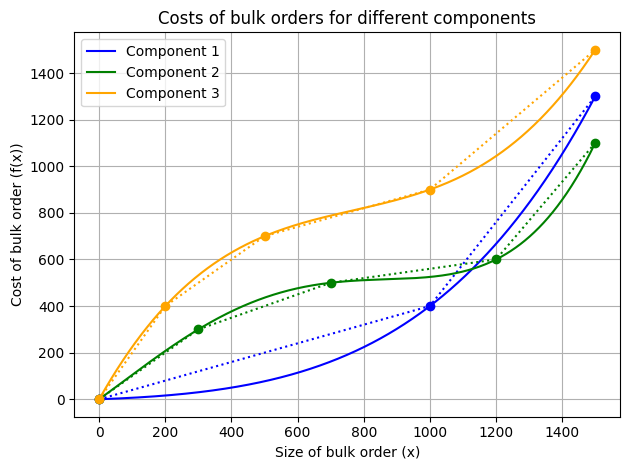

In [106]:
import numpy as np


def plot_cost_component(cost_component, ax, label, color):
    print(cost_component)
    x, y = [x for x, y in cost_component], [y for x, y in cost_component]
    n = 4
    coefficients = np.polyfit(x, y, n)

    # Define the function
    def f(x: int) -> float:
        return sum(c * x ** (n - i) for i, c in enumerate(coefficients))

    x = [i for i in range(1500)]
    y = [f(i) for i in x]
    ax.plot(x, y, label=label, color=color)
    ax.plot(
        [x for x, y in cost_component],
        [y for x, y in cost_component],
        ":o",
        color=color,
    )


import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.title("Costs of bulk orders for different components")
plot_cost_component(costs_1, ax, "Component 1", "blue")
plot_cost_component(costs_2, ax, "Component 2", "green")
plot_cost_component(costs_3, ax, "Component 3", "orange")

ax.set_xlabel("Size of bulk order (x)")
ax.set_ylabel("Cost of bulk order (f(x))")
# plt.plot([x for x, y in cost_component_1], [y for x, y in cost_component_1], 'bo-')
# plt.plot([x for x, y in cost_component_2], [y for x, y in cost_component_2], 'o-', color='orange')
# plt.plot([x for x, y in cost_component_3], [y for x, y in cost_component_3], 'go-')

plt.grid()
ax.legend()
plt.tight_layout()
plt.savefig("production_example_cost_components.pdf")
plt.show()

[(0, 0), (100, 800), (200, 1600), (300, 2000)]
[(0, 0), (80, 1000), (150, 1300), (200, 1400), (300, 1500)]


/tmp/ipykernel_468786/2953457985.py:6: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, n)


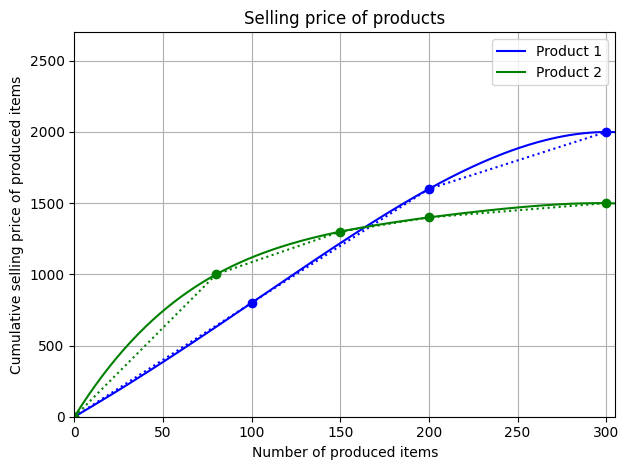

In [108]:
gain_1 = [(0, 0), (100, 800), (200, 1600), (300, 2_000)]
gain_2 = [(0, 0), (80, 1_000), (150, 1_300), (200, 1_400), (300, 1_500)]

fig, ax = plt.subplots()
plt.title("Selling price of products")
plot_cost_component(gain_1, ax, "Product 1", "blue")
plot_cost_component(gain_2, ax, "Product 2", "green")
plt.xlim(0, 305)
plt.ylim(0, 2_700)
plt.grid()
plt.xlabel("Number of produced items")
plt.ylabel("Cumulative selling price of produced items")
plt.legend()
plt.tight_layout()
plt.savefig("production_example_selling_price.png")
plt.show()

In [104]:
requirements_1 = (3, 5, 2)
requirements_2 = (2, 1, 3)

from ortools.sat.python import cp_model

model = cp_model.CpModel()
buy_1 = model.new_int_var(0, 1_500, "buy_1")
buy_2 = model.new_int_var(0, 1_500, "buy_2")
buy_3 = model.new_int_var(0, 1_500, "buy_3")

produce_1 = model.new_int_var(0, 300, "produce_1")
produce_2 = model.new_int_var(0, 300, "produce_2")

model.add(produce_1 * requirements_1[0] + produce_2 * requirements_2[0] <= buy_1)
model.add(produce_1 * requirements_1[1] + produce_2 * requirements_2[1] <= buy_2)
model.add(produce_1 * requirements_1[2] + produce_2 * requirements_2[2] <= buy_3)

from piecewise_functions import PiecewiseLinearFunction, PiecewiseLinearConstraint

costs_1 = [(0, 0), (1000, 400), (1500, 1300)]
costs_2 = [(0, 0), (300, 300), (700, 500), (1200, 600), (1500, 1100)]
costs_3 = [(0, 0), (200, 400), (500, 700), (1000, 900), (1500, 1500)]
f_costs_1 = PiecewiseLinearFunction(
    xs=[x for x, y in costs_1], ys=[y for x, y in costs_1]
)
f_costs_2 = PiecewiseLinearFunction(
    xs=[x for x, y in costs_2], ys=[y for x, y in costs_2]
)
f_costs_3 = PiecewiseLinearFunction(
    xs=[x for x, y in costs_3], ys=[y for x, y in costs_3]
)

gain_1 = [(0, 0), (100, 800), (200, 1600), (300, 2_000)]
gain_2 = [(0, 0), (80, 1_000), (150, 1_300), (200, 1_400), (300, 1_500)]
f_gain_1 = PiecewiseLinearFunction(xs=[x for x, y in gain_1], ys=[y for x, y in gain_1])
f_gain_2 = PiecewiseLinearFunction(xs=[x for x, y in gain_2], ys=[y for x, y in gain_2])

x_costs_1 = PiecewiseLinearConstraint(model, buy_1, f_costs_1, upper_bound=False)
x_costs_2 = PiecewiseLinearConstraint(model, buy_2, f_costs_2, upper_bound=False)
x_costs_3 = PiecewiseLinearConstraint(model, buy_3, f_costs_3, upper_bound=False)

x_gain_1 = PiecewiseLinearConstraint(model, produce_1, f_gain_1, upper_bound=True)
x_gain_2 = PiecewiseLinearConstraint(model, produce_2, f_gain_2, upper_bound=True)

model.maximize(x_gain_1.y + x_gain_2.y - (x_costs_1.y + x_costs_2.y + x_costs_3.y))

solver = cp_model.CpSolver()
solver.parameters.log_search_progress = True
status = solver.solve(model)
print(f"Buy {solver.value(buy_1)} of component 1")
print(f"Buy {solver.value(buy_2)} of component 2")
print(f"Buy {solver.value(buy_3)} of component 3")
print(f"Produce {solver.value(produce_1)} of product 1")
print(f"Produce {solver.value(produce_2)} of product 2")
print(f"Overall gain: {solver.ObjectiveValue()}")


Starting CP-SAT solver v9.9.3963
Parameters: log_search_progress: true
Setting number of workers to 16

Initial optimization model '': (model_fingerprint: 0x70af42a01e0ba820)
#Variables: 16 (#ints: 5 in objective)
  - 6 Booleans in [0,1]
  - 2 in [0,300]
  - 1 in [0,1100]
  - 1 in [0,1300]
  - 5 in [0,1500]
  - 1 in [0,2000]
#kExactlyOne: 2 (#literals: 6)
#kLinear1: 26 (#enforced: 16)
#kLinear2: 22 (#enforced: 8)
#kLinear3: 3

Starting presolve at 0.00s
  2.45e-05s  0.00e+00d  [DetectDominanceRelations] 
  1.87e-04s  0.00e+00d  [PresolveToFixPoint] #num_loops=2 #num_dual_strengthening=1 
  3.72e-06s  0.00e+00d  [ExtractEncodingFromLinear] #potential_supersets=2 
[Symmetry] Graph for symmetry has 75 nodes and 104 arcs.
[Symmetry] Symmetry computation done. time: 3.9864e-05 dtime: 1.054e-05
  2.58e-04s  1.87e-05d  [Probe] #probed=28 #new_binary_clauses=4 
  3.65e-06s  0.00e+00d  [MaxClique] 
  1.70e-05s  0.00e+00d  [DetectDominanceRelations] 
  1.05e-04s  0.00e+00d  [PresolveToFixPoint]

/tmp/ipykernel_468786/4113396303.py:9: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, n)


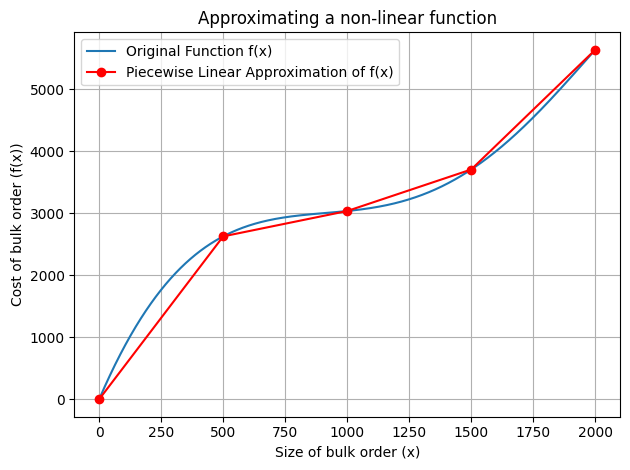

In [45]:
cost_component_1 = [
    (0, 0),
    (500, 2_000),
    (1_000, 3_000),
    (1_900, 4_000),
    (2_500, 7_000),
]
cost_component_2 = [
    (0, 0),
    (300, 2_000),
    (900, 3_000),
    (1_600, 4_000),
    (2_500, 7_000),
]
cost_component_3 = [
    (0, 0),
    (700, 2_000),
    (1_200, 3_000),
    (2_100, 4_000),
    (2_500, 7_000),
]


def plot_cost_component(cost_component, ax, label):
    x, y = zip(*cost_component)
    n = 5
    coefficients = np.polyfit(x, y, n)

    # Define the function
    def f(x: int) -> float:
        return sum(c * x ** (n - i) for i, c in enumerate(coefficients))

    x = [i for i in range(2_000)]
    y = [f(i) for i in x]
    ax.plot(x, y, label=label)
    ax.plot(
        [x for x in range(0, 2_001, 500)],
        [f(x) for x in range(0, 2_001, 500)],
        "-ro",
        label="Piecewise Linear Approximation of f(x)",
    )


import matplotlib.pyplot as plt

fig, ax = plt.subplots()
plt.title("Approximating a non-linear function")
# plot_cost_component(cost_component_1, ax, 'Component 1')
plot_cost_component(cost_component_2, ax, "Original Function f(x)")
# plot_cost_component(cost_component_3, ax, 'Component 3')
ax.set_xlabel("Size of bulk order (x)")
ax.set_ylabel("Cost of bulk order (f(x))")
# plt.plot([x for x, y in cost_component_1], [y for x, y in cost_component_1], 'bo-')
# plt.plot([x for x, y in cost_component_2], [y for x, y in cost_component_2], 'o-', color='orange')
# plt.plot([x for x, y in cost_component_3], [y for x, y in cost_component_3], 'go-')

plt.grid()
ax.legend()
plt.tight_layout()
plt.savefig("./pwla.png")
plt.show()

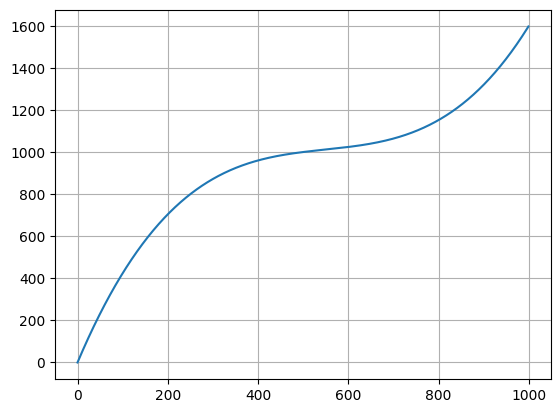

In [3]:
# Define the points
x = np.array([0, 500, 750, 1000])
y = np.array([0, 1000, 1100, 1600])

# Fit a cubic polynomial to the points
coefficients = np.polyfit(x, y, 3)


# Define the function
def f(x: int) -> float:
    return (
        coefficients[0] * x**3
        + coefficients[1] * x**2
        + coefficients[2] * x
        + coefficients[3]
    )


import matplotlib.pyplot as plt

# Plot the points
x_ = list(range(0, 1000))
y_ = [f(i) for i in x_]
plt.plot(x_, y_)
plt.grid()
plt.show()